In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pitches = pd.read_csv("pitches.csv")
pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [4]:
games = pd.read_csv("games.csv")
games.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [5]:
atbats = pd.read_csv("atbats.csv")
hr_event = atbats[atbats["event"]=="Home Run"]
hr_num = len(hr_event)
event_set = set(atbats['event'])
event_dic = dict(zip(event_set,[0]*len(event_set)))
for event in atbats['event']:
    event_dic[event] += 1
event_dic

{'Double Play': 1807,
 'Flyout': 80731,
 'Single': 108794,
 'Walk': 56894,
 'Sac Fly': 4773,
 'Home Run': 22209,
 'Intent Walk': 3782,
 'Batter Interference': 158,
 'Fielders Choice': 395,
 'Double': 33157,
 'Pop Out': 34455,
 'Sac Fly DP': 76,
 'Catcher Interference': 153,
 'Strikeout - DP': 580,
 'Groundout': 134893,
 'Triple': 3454,
 'Sac Bunt': 3969,
 'Strikeout': 157128,
 'Triple Play': 20,
 'Bunt Lineout': 52,
 'Hit By Pitch': 6938,
 'Forceout': 15112,
 'Lineout': 44934,
 'Bunt Pop Out': 569,
 'Bunt Groundout': 1253,
 'Runner Out': 1742,
 'Field Error': 6390,
 'Sacrifice Bunt DP': 4,
 'Grounded Into DP': 14717,
 'Fielders Choice Out': 1250}

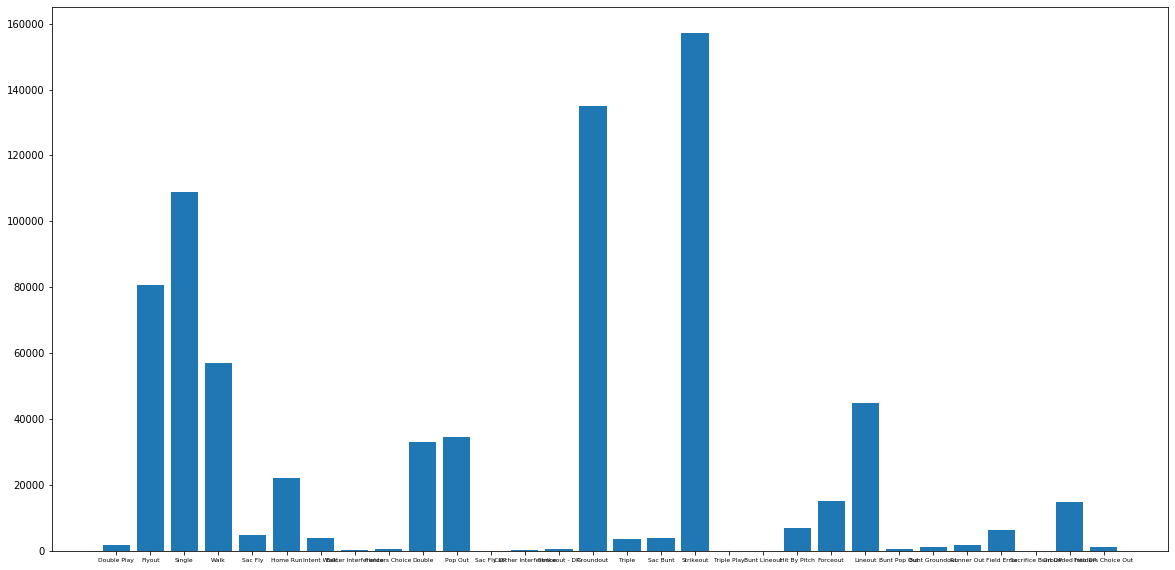

In [6]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=6)
plt.bar(event_dic.keys(), event_dic.values())
plt.savefig('event_count.png',dpi=300)

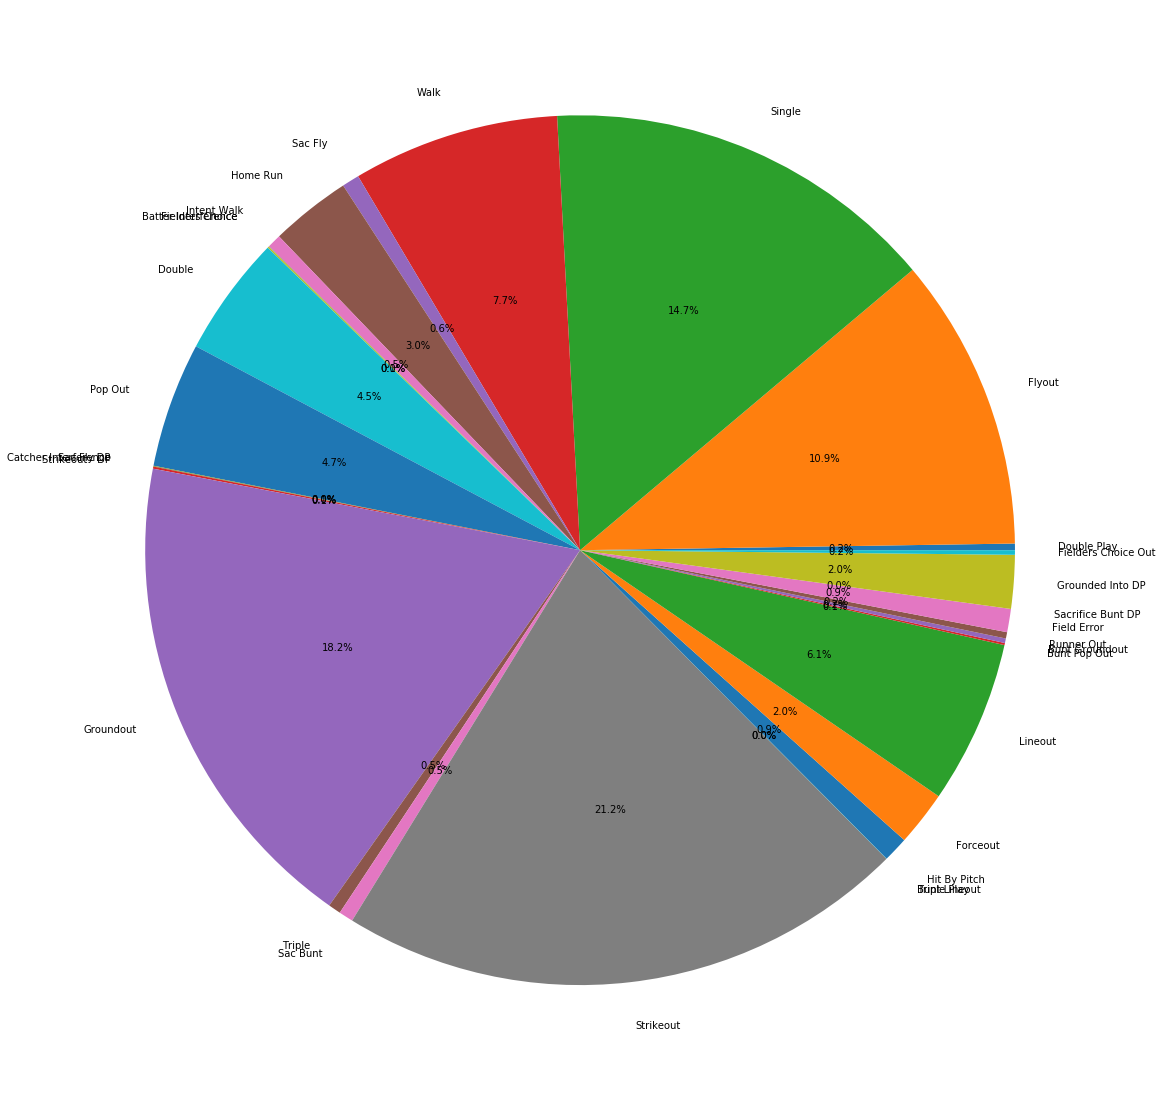

In [7]:
# separate = [1/i for i in event_ratio.values() ]
plt.figure(figsize=(20,20))
plt.pie(event_dic.values(), labels=event_dic.keys(), autopct="%1.1f%%")

# print(separate)
plt.show()

In [8]:
event_dic.values()

dict_values([1807, 80731, 108794, 56894, 4773, 22209, 3782, 158, 395, 33157, 34455, 76, 153, 580, 134893, 3454, 3969, 157128, 20, 52, 6938, 15112, 44934, 569, 1253, 1742, 6390, 4, 14717, 1250])

In [9]:
event_num = sum(event_dic.values())
event_ratio = dict(zip(event_set,[round(i / event_num,5) for i in event_dic.values()]))
# event_ratio = sorted(event_ratio.values())
event_ratio = dict(sorted(event_ratio.items(), key=lambda x:x[1], reverse=True))
event_ratio

{'Strikeout': 0.21222,
 'Groundout': 0.18219,
 'Single': 0.14694,
 'Flyout': 0.10904,
 'Walk': 0.07684,
 'Lineout': 0.06069,
 'Pop Out': 0.04654,
 'Double': 0.04478,
 'Home Run': 0.03,
 'Forceout': 0.02041,
 'Grounded Into DP': 0.01988,
 'Hit By Pitch': 0.00937,
 'Field Error': 0.00863,
 'Sac Fly': 0.00645,
 'Sac Bunt': 0.00536,
 'Intent Walk': 0.00511,
 'Triple': 0.00467,
 'Double Play': 0.00244,
 'Runner Out': 0.00235,
 'Bunt Groundout': 0.00169,
 'Fielders Choice Out': 0.00169,
 'Strikeout - DP': 0.00078,
 'Bunt Pop Out': 0.00077,
 'Fielders Choice': 0.00053,
 'Batter Interference': 0.00021,
 'Catcher Interference': 0.00021,
 'Sac Fly DP': 0.0001,
 'Bunt Lineout': 7e-05,
 'Triple Play': 3e-05,
 'Sacrifice Bunt DP': 1e-05}

In [10]:
event_ratio.values()

dict_values([0.21222, 0.18219, 0.14694, 0.10904, 0.07684, 0.06069, 0.04654, 0.04478, 0.03, 0.02041, 0.01988, 0.00937, 0.00863, 0.00645, 0.00536, 0.00511, 0.00467, 0.00244, 0.00235, 0.00169, 0.00169, 0.00078, 0.00077, 0.00053, 0.00021, 0.00021, 0.0001, 7e-05, 3e-05, 1e-05])

In [11]:
player_name = pd.read_csv("player_names.csv")
player_name.head()

,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [12]:
games.dtypes

attendance           int64
away_final_score     int64
away_team           object
date                object
elapsed_time         int64
g_id                 int64
home_final_score     int64
home_team           object
start_time          object
umpire_1B           object
umpire_2B           object
umpire_3B           object
umpire_HP           object
venue_name          object
weather             object
wind                object
delay                int64
dtype: object

In [13]:
pitches["ab_id"] = pitches["ab_id"].astype(int)
pitches['ab_id']

0          2015000001
1          2015000001
2          2015000001
3          2015000001
4          2015000001
5          2015000001
6          2015000002
7          2015000002
8          2015000003
9          2015000003
10         2015000003
11         2015000004
12         2015000004
13         2015000004
14         2015000005
15         2015000005
16         2015000005
17         2015000005
18         2015000005
19         2015000006
20         2015000006
21         2015000007
22         2015000007
23         2015000007
24         2015000007
25         2015000008
26         2015000008
27         2015000008
28         2015000008
29         2015000008
              ...    
2867124    2018185568
2867125    2018185568
2867126    2018185568
2867127    2018185569
2867128    2018185569
2867129    2018185569
2867130    2018185570
2867131    2018185570
2867132    2018185570
2867133    2018185571
2867134    2018185571
2867135    2018185571
2867136    2018185571
2867137    2018185572
2867138   

In [14]:
player_name

,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez
5,593372,Carlos,Martinez
6,467008,Pedro,Strop
7,477229,Jordan,Walden
8,444468,Hector,Rondon
9,572096,Trevor,Rosenthal


In [15]:
player_name.rename(columns={"id": "batter_id" }, inplace=True)
player_name

,batter_id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez
5,593372,Carlos,Martinez
6,467008,Pedro,Strop
7,477229,Jordan,Walden
8,444468,Hector,Rondon
9,572096,Trevor,Rosenthal


In [16]:
new_df = pd.merge(pitches, atbats,  how='left', left_on='ab_id', right_on = 'ab_id')

# sorted(new_df)
new_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,572761,Groundout,201500001,1,1,0,L,452657,L,True


In [17]:
new_df.loc[0:10,["ab_id","batter_id"]]

,ab_id,batter_id
0,2015000001,572761
1,2015000001,572761
2,2015000001,572761
3,2015000001,572761
4,2015000001,572761
5,2015000001,572761
6,2015000002,518792
7,2015000002,518792
8,2015000003,407812
9,2015000003,407812


In [18]:
new_df1 = pd.merge(new_df, games, how='left', left_on='g_id', right_on="g_id")
new_df1.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0


In [19]:
a = sorted(new_df1.columns)
a

['ab_id',
 'attendance',
 'away_final_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'b_count',
 'b_score',
 'batter_id',
 'break_angle',
 'break_length',
 'break_y',
 'code',
 'date',
 'delay',
 'elapsed_time',
 'end_speed',
 'event',
 'event_num',
 'g_id',
 'home_final_score',
 'home_team',
 'inning',
 'nasty',
 'o',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs',
 'p_score',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_num',
 'pitch_type',
 'pitcher_id',
 'px',
 'pz',
 's_count',
 'spin_dir',
 'spin_rate',
 'stand',
 'start_speed',
 'start_time',
 'sz_bot',
 'sz_top',
 'top',
 'type',
 'type_confidence',
 'umpire_1B',
 'umpire_2B',
 'umpire_3B',
 'umpire_HP',
 'venue_name',
 'vx0',
 'vy0',
 'vz0',
 'weather',
 'wind',
 'x',
 'x0',
 'y',
 'y0',
 'z0',
 'zone']

In [20]:
new_df2 = pd.merge(new_df1, player_name, how='left', left_on='batter_id', right_on="batter_id")
new_df2

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,first_name,last_name
0,0.416000,2.963000,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter
1,-0.191000,2.347000,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter
2,-0.518000,3.284000,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter
3,-0.641000,1.221000,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter
4,-1.821000,2.083000,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter
5,0.627000,2.397000,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter
6,-1.088000,1.610000,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7,14.549000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Jason,Heyward
7,-0.257000,2.047000,89.3,82.4,1433.743,185.948,7.3,4.8,23.8,-1.339000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Jason,Heyward
8,1.470000,2.350000,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8,13.808000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Holliday
9,-1.337000,1.898000,89.3,82.0,1384.143,174.388,2.0,4.9,23.8,1.218000,...,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Holliday


In [21]:
new_df2["Batters Name"] = new_df2[["first_name", 'last_name']].apply(lambda x: ' '.join(x), axis=1)

In [22]:
new_df2.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [23]:
player_name.head()

,batter_id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [24]:
player_name.rename(columns={'batter_id': 'pitcher_id'}, inplace=True)

In [25]:
player_name.head()

,pitcher_id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [26]:
final_df = pd.merge(new_df2, player_name, how='left', left_on='pitcher_id', right_on='pitcher_id')
final_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay,Batters Name,first_name,last_name
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt Carpenter,Jon,Lester
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt Carpenter,Jon,Lester
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt Carpenter,Jon,Lester
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt Carpenter,Jon,Lester
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt Carpenter,Jon,Lester


In [27]:
final_df = final_df[sorted(final_df.columns)]

In [28]:
final_df['Pitcher_name'] = final_df[['first_name', 'last_name']].apply(lambda x: " ".join(x), axis=1)

In [29]:
final_df.columns

Index(['Batters Name', 'ab_id', 'attendance', 'away_final_score', 'away_team',
       'ax', 'ay', 'az', 'b_count', 'b_score', 'batter_id', 'break_angle',
       'break_length', 'break_y', 'code', 'date', 'delay', 'elapsed_time',
       'end_speed', 'event', 'event_num', 'first_name', 'g_id',
       'home_final_score', 'home_team', 'inning', 'last_name', 'nasty', 'o',
       'on_1b', 'on_2b', 'on_3b', 'outs', 'p_score', 'p_throws', 'pfx_x',
       'pfx_z', 'pitch_num', 'pitch_type', 'pitcher_id', 'px', 'pz', 's_count',
       'spin_dir', 'spin_rate', 'stand', 'start_speed', 'start_time', 'sz_bot',
       'sz_top', 'top', 'type', 'type_confidence', 'umpire_1B', 'umpire_2B',
       'umpire_3B', 'umpire_HP', 'venue_name', 'vx0', 'vy0', 'vz0', 'weather',
       'wind', 'x', 'x0', 'y', 'y0', 'z0', 'zone', 'Pitcher_name'],
      dtype='object')

In [30]:
final_df.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [31]:
# Find the pitcher vs batters pair and information of events
final_df.loc[:10,['Batters Name','Pitcher_name']]
final_df['pitch_type'] = final_df['pitch_type'].map({'FF': 'Four Seam Fastball', 'SL': 'Slider', 'FT': 'Two seam fastball', 'CH': 'Changeup', 'SI': 'Sinker', 'CU': 'Curveball', 'FC': 'Cutter', 'KC': 'Knuckle Curve', 'FS': 'Splitter','KN': 'Knuckleball', 'EP': 'Eephus', 'FO': 'Pitch Out', 'PO': 'Pitch Out', 'SC': 'Screwball', 'UN': 'Unidentified', 'FA': 'Fastball', 'IN': 'Intentional Ball'})

In [32]:
final_df['code'] = final_df['code'].map({'B': 'Ball', '*B': 'Ball in dirt', 'S': 'Swinging Strike', 'C': 'Called Strike', 'F': 'Foul', 'T': 'Foul Tip', 'L': 'Foul Bunt', 'I': 'Intentional Ball', 'W': 'Blocked','M': 'Missed Bunt', 'P': 'Pitch Out', 'Q': 'Swinging Pitch Out', 'R': 'Foul Pitch Out', 'X': 'In play out(s)', 'D': 'In play no out', 'E': 'In play runs'})

In [33]:
final_df.head()

,Batters Name,ab_id,attendance,away_final_score,away_team,ax,ay,az,b_count,b_score,...,vz0,weather,wind,x,x0,y,y0,z0,zone,Pitcher_name
0,Matt Carpenter,2015000001,35055,3,sln,7.665,34.685,-11.960,0.0,0.0,...,-3.995,"44 degrees, clear","7 mph, In from CF",101.140000,2.280,158.780000,50.0,5.302,3.0,Jon Lester
1,Matt Carpenter,2015000001,35055,3,sln,12.043,34.225,-10.085,0.0,0.0,...,-5.980,"44 degrees, clear","7 mph, In from CF",124.280000,2.119,175.410000,50.0,5.307,5.0,Jon Lester
2,Matt Carpenter,2015000001,35055,3,sln,14.368,35.276,-11.560,0.0,0.0,...,-3.337,"44 degrees, clear","7 mph, In from CF",136.740000,2.127,150.110000,50.0,5.313,1.0,Jon Lester
3,Matt Carpenter,2015000001,35055,3,sln,2.104,28.354,-20.540,0.0,0.0,...,-6.567,"44 degrees, clear","7 mph, In from CF",109.685636,2.279,187.463482,50.0,5.210,13.0,Jon Lester
4,Matt Carpenter,2015000001,35055,3,sln,-10.280,21.774,-34.111,1.0,0.0,...,0.325,"44 degrees, clear","7 mph, In from CF",146.527525,2.179,177.242829,50.0,5.557,13.0,Jon Lester


In [250]:
Coledf = final_df[final_df['Pitcher_name']=='Gerrit Cole']
Coledf[["start_speed"]].mean()

start_speed    92.011361
dtype: float64

In [260]:
grp = final_df.groupby(['Pitcher_name'])[["s_count"]].sum()
grp1 = final_df.groupby(['Batters Name'])[['b_count']].sum()

In [261]:
grp.head()

,s_count
Pitcher_name,
A.J. Achter,661.0
A.J. Burnett,2069.0
A.J. Cole,2381.0
A.J. Griffin,3009.0
A.J. Minter,1197.0


In [262]:
ERA = grp.s_count / len(final_df)
BA = grp1.b_count / len(final_df) * 100

In [264]:
ERA.sort_values(ascending=False)

Pitcher_name
Max Scherzer         4.558876e-03
Justin Verlander     4.323102e-03
Chris Sale           4.259276e-03
Jose Quintana        4.195798e-03
Chris Archer         4.044429e-03
Rick Porcello        4.044080e-03
Jon Lester           3.962815e-03
Corey Kluber         3.928286e-03
Zack Greinke         3.868296e-03
Jacob deGrom         3.830279e-03
Gio Gonzalez         3.827140e-03
Jake Odorizzi        3.805865e-03
Gerrit Cole          3.778660e-03
Jake Arrieta         3.717275e-03
Julio Teheran        3.716926e-03
Trevor Bauer         3.698441e-03
Marco Estrada        3.604271e-03
J.A. Happ            3.592064e-03
Cole Hamels          3.581949e-03
David Price          3.541491e-03
Tanner Roark         3.540793e-03
Ian Kennedy          3.533818e-03
Kevin Gausman        3.530330e-03
Dallas Keuchel       3.522308e-03
Mike Fiers           3.501730e-03
Carlos Carrasco      3.483594e-03
Kyle Gibson          3.456389e-03
Kyle Hendricks       3.436858e-03
James Shields        3.433370e-03
M

In [265]:
BA.sort_values(ascending=False)

Batters Name
Joey Votto           0.420033
Paul Goldschmidt     0.415011
Carlos Santana       0.403397
Mike Trout           0.383516
Matt Carpenter       0.382470
Andrew McCutchen     0.380970
Brett Gardner        0.369809
Edwin Encarnacion    0.366147
Bryce Harper         0.365275
Brian Dozier         0.365136
Nick Markakis        0.356451
Jose Bautista        0.345953
Christian Yelich     0.345778
Justin Upton         0.345081
Mookie Betts         0.344767
Curtis Granderson    0.343476
Anthony Rizzo        0.341837
Charlie Blackmon     0.336885
Eric Hosmer          0.336257
Joe Mauer            0.336117
Manny Machado        0.333327
Chris Davis          0.328130
Todd Frazier         0.326910
Kyle Seager          0.325828
Jose Ramirez         0.324782
Nelson Cruz          0.324712
George Springer      0.324642
Kris Bryant          0.316551
DJ LeMahieu          0.316097
Cesar Hernandez      0.314772
                       ...   
LaTroy Hawkins       0.000000
Tommy Hunter         0.0000

In [270]:
home_run_event = final_df[final_df['event']=='Home Run']['pitch_type']

In [273]:
# Analyize which kinds of ball is more relevant to hr
hr_set = set(home_run_event)
hr_dict = dict(zip(hr_set,[0]*len(hr_set)))
for event in home_run_event:
    hr_dict[event] += 1
print(hr_dict)


{nan: 169, 'Cutter': 3908, 'Sinker': 5641, 'Changeup': 8166, 'Two seam fastball': 8435, 'Slider': 11650, 'Splitter': 1168, 'Unidentified': 1, 'Knuckleball': 268, 'Pitch Out': 39, 'Eephus': 23, 'Screwball': 4, 'Knuckle Curve': 1462, 'Four Seam Fastball': 28223, 'Curveball': 5918}


([<matplotlib.patches.Wedge at 0x18d26515e80>,
 [Text(1.0999724929900927, 0.007779117248151687, 'nan'),
  Text(1.0826823515203567, 0.19441945814745693, 'Cutter'),
  Text(0.9217533864144558, 0.6003088327131987, 'Sinker'),
  Text(0.4442753164450712, 1.0062899399266754, 'Changeup'),
  Text(-0.3028544917133433, 1.0574871899219642, 'Two seam fastball'),
  Text(-0.9898241810376466, 0.4798417349847263, 'Slider'),
  Text(-1.0960296320208698, -0.09337583055693406, 'Splitter'),
  Text(-1.0901525670891015, -0.14685836874023386, 'Unidentified'),
  Text(-1.0884304113468901, -0.15912020505026905, 'Knuckleball'),
  Text(-1.086296476445974, -0.17308947183772302, 'Pitch Out'),
  Text(-1.085843747996985, -0.17590723389292603, 'Eephus'),
  Text(-1.0856443073261162, -0.17713395487708672, 'Screwball'),
  Text(-1.072742405030158, -0.2433592662096776, 'Knuckle Curve'),
  Text(-0.11585103052787583, -1.0938823239844537, 'Four Seam Fastball'),
  Text(1.0664416164528938, -0.2696336008314602, 'Curveball')],
 [Tex

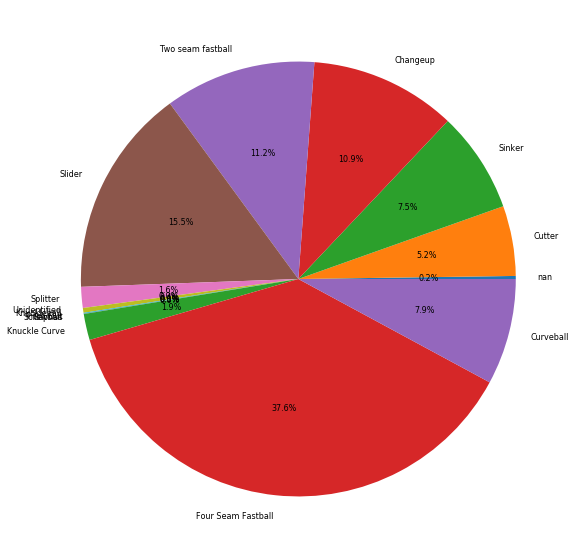

In [280]:
plt.figure(figsize=(10,10))
plt.pie(hr_dict.values(), labels=hr_set, autopct="%1.1f%%" , textprops = {"fontsize" : 8})

In [285]:
pitch_type_dict = dict(final_df['pitch_type'].value_counts())

In [298]:
set(pitch_type_dict.keys())-set(hr_dict.keys())

{'Fastball', 'Intentional Ball'}

dict_keys([nan, 'Cutter', 'Sinker', 'Changeup', 'Two seam fastball', 'Slider', 'Splitter', 'Unidentified', 'Knuckleball', 'Pitch Out', 'Eephus', 'Screwball', 'Knuckle Curve', 'Four Seam Fastball', 'Curveball'])

In [296]:
a={1,2,3}
b={1,2}
a-b

{3}

([<matplotlib.patches.Wedge at 0x18d2ffe0588>,
 [Text(0.4816718347157942, 0.988934903642055, 'Four Seam Fastball'),
  Text(-1.0086913463449423, 0.438795815623654, 'Slider'),
  Text(-0.986623774901533, -0.4863882469787374, 'Two seam fastball'),
  Text(-0.4467183889541666, -1.0052077799988388, 'Changeup'),
  Text(0.18746493873667483, -1.0839081588144148, 'Sinker'),
  Text(0.7056074461318427, -0.8438709213874472, 'Curveball'),
  Text(0.9898290800287506, -0.47983162914655525, 'Cutter'),
  Text(1.075079375761541, -0.2328182463042269, 'Knuckle Curve'),
  Text(1.0953552572449023, -0.10097950497974266, 'Splitter'),
  Text(1.0994576591741778, -0.03453774287989659, 'Knuckleball'),
  Text(1.099918407640615, -0.013397631631518957, 'Intentional Ball'),
  Text(1.0999921724386381, -0.004149767912242714, 'Pitch Out'),
  Text(1.099999082492228, -0.0014207449653054142, 'Eephus'),
  Text(1.0999999599940746, -0.00029666990818248413, 'Screwball'),
  Text(1.0999999962564873, -9.075091375176446e-05, 'Unident

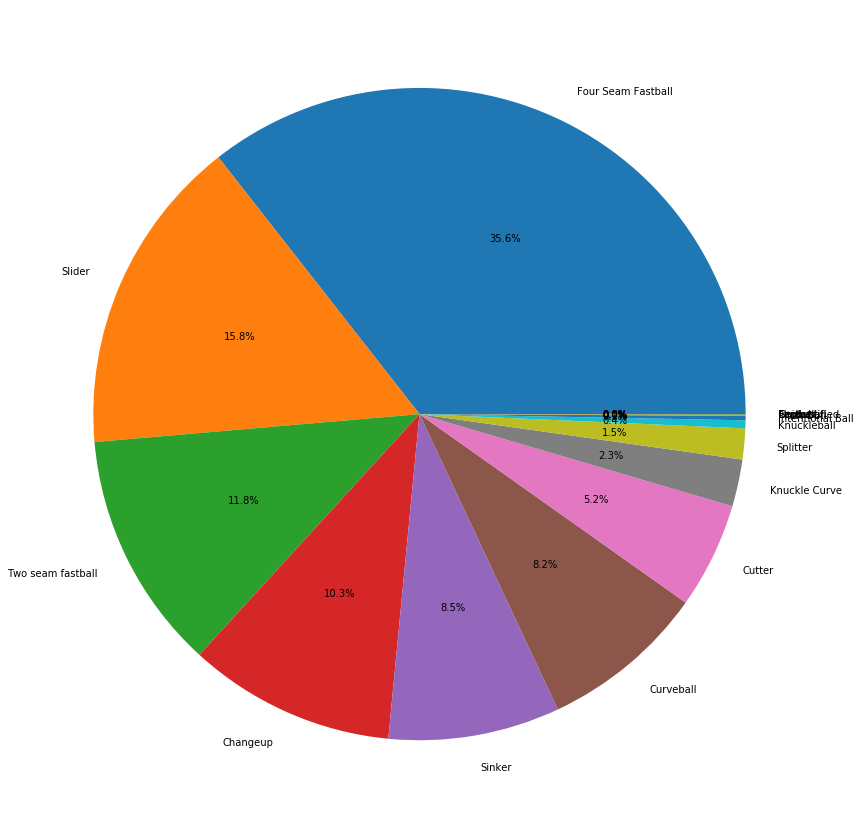

In [369]:
# pitch type distribution
# 
plt.figure(figsize=(15,15))
plt.pie(pitch_type_dict.values(), labels=pitch_type_dict.keys(), autopct="%1.1f%%")

<BarContainer object of 16 artists>

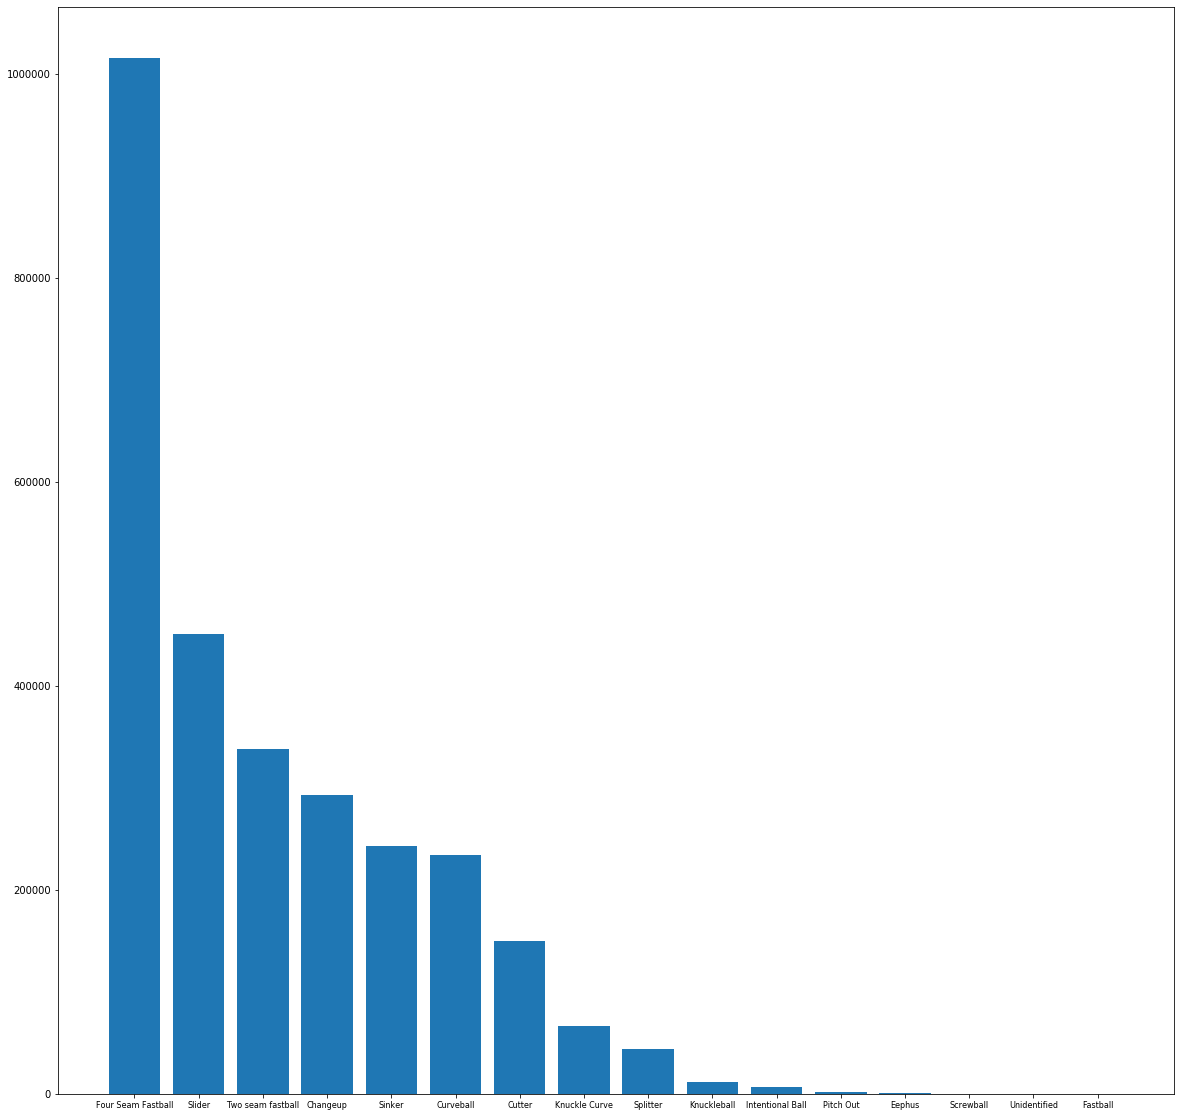

In [372]:
plt.figure(figsize=(20,20))
plt.xticks(fontsize=8)
plt.bar(pitch_type_dict.keys(),pitch_type_dict.values())

In [317]:
hr_nor_dict = dict(zip(hr_set,[hr_dict[i]/pitch_type_dict[i] for i in hr_dict if i in set(pitch_type_dict)] ) )

In [318]:
hr_nor_dict

{nan: 0.026095782472822456,
 'Cutter': 0.02326147197571999,
 'Sinker': 0.027890392057078647,
 'Changeup': 0.024956876529292894,
 'Two seam fastball': 0.025855678706017605,
 'Slider': 0.026724631049079052,
 'Splitter': 0.017543859649122806,
 'Unidentified': 0.023801065719360567,
 'Knuckleball': 0.027121001390820583,
 'Pitch Out': 0.02822085889570552,
 'Eephus': 0.035398230088495575,
 'Screwball': 0.02199025329402563,
 'Knuckle Curve': 0.02780928132177594,
 'Four Seam Fastball': 0.025248409708563894}

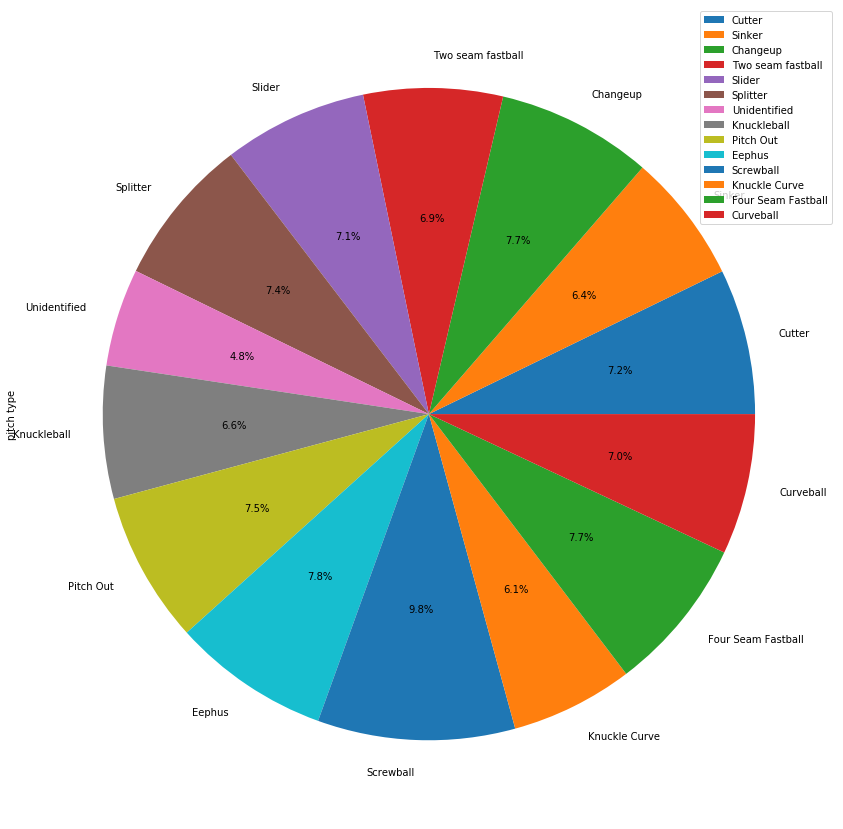

In [360]:
hr_nor_dict = dict()
for i in hr_dict:
    if i in pitch_type_dict.keys():
        hr_nor_dict[i] = hr_dict[i] / pitch_type_dict[i]
#         print(i,hr_nor_dict[i])
hr_df = pd.DataFrame.from_dict(hr_nor_dict,columns=["pitch type"],orient='index')
hr_df = hr_df/hr_df.sum()
hr_df.plot.pie(y="pitch type", figsize=(15,15),autopct='%1.1f%%')

In [377]:
final_df.columns

Index(['Batters Name', 'ab_id', 'attendance', 'away_final_score', 'away_team',
       'ax', 'ay', 'az', 'b_count', 'b_score', 'batter_id', 'break_angle',
       'break_length', 'break_y', 'code', 'date', 'delay', 'elapsed_time',
       'end_speed', 'event', 'event_num', 'g_id', 'home_final_score',
       'home_team', 'inning', 'nasty', 'o', 'on_1b', 'on_2b', 'on_3b', 'outs',
       'p_score', 'p_throws', 'pfx_x', 'pfx_z', 'pitch_num', 'pitch_type',
       'pitcher_id', 'px', 'pz', 's_count', 'spin_dir', 'spin_rate', 'stand',
       'start_speed', 'start_time', 'sz_bot', 'sz_top', 'top', 'type',
       'type_confidence', 'umpire_1B', 'umpire_2B', 'umpire_3B', 'umpire_HP',
       'venue_name', 'vx0', 'vy0', 'vz0', 'weather', 'wind', 'x', 'x0', 'y',
       'y0', 'z0', 'zone', 'Pitcher_name'],
      dtype='object')

In [36]:
hit_df = final_df[['event','pitch_type']]


In [37]:
hit_df[hit_df['event']=='Single']['pitch_type'].value_counts()

Four Seam Fastball    127672
Slider                 55264
Two seam fastball      48490
Changeup               37467
Sinker                 35111
Curveball              28996
Cutter                 19571
Knuckle Curve           8202
Splitter                5139
Knuckleball             1426
Pitch Out                187
Eephus                   107
Screwball                 15
Unidentified               3
Fastball                   2
Name: pitch_type, dtype: int64

In [44]:
set(hit_df[hit_df['event']=='Single']['pitch_type'].value_counts().index)

{'Changeup',
 'Curveball',
 'Cutter',
 'Eephus',
 'Fastball',
 'Four Seam Fastball',
 'Knuckle Curve',
 'Knuckleball',
 'Pitch Out',
 'Screwball',
 'Sinker',
 'Slider',
 'Splitter',
 'Two seam fastball',
 'Unidentified'}

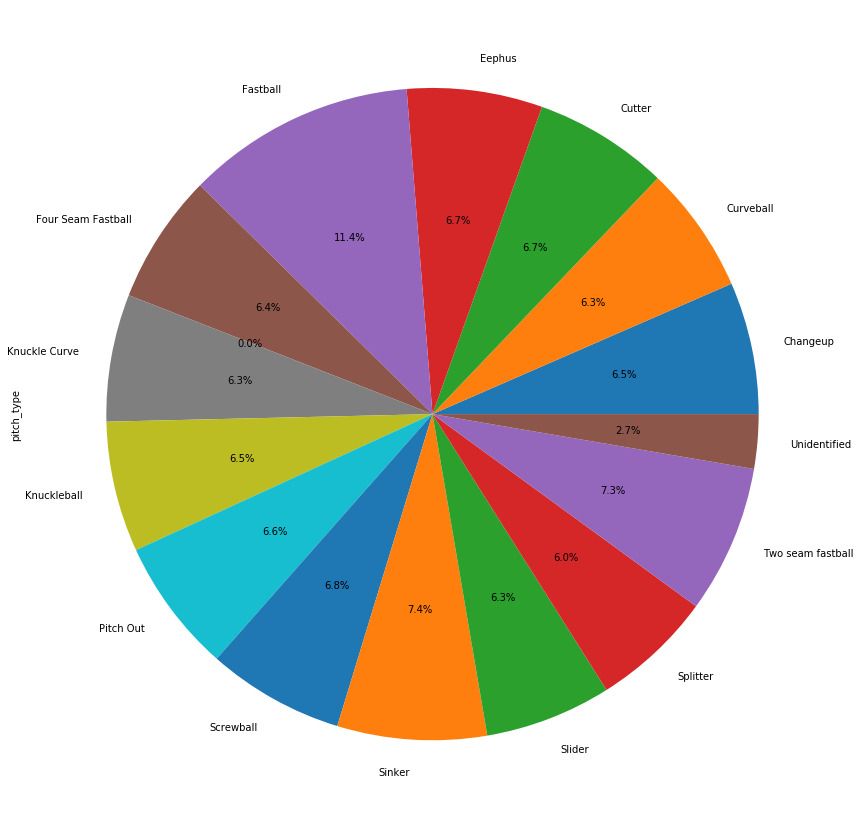

In [411]:
hit_nor_df = hit_df[hit_df['event']=='Single']['pitch_type'].value_counts()/final_df['pitch_type'].value_counts()
hit_nor_df = hit_nor_df / hit_nor_df.sum()
hit_nor_df.plot.pie(y='pitch_type', figsize=(15,15), autopct="%1.1f%%")

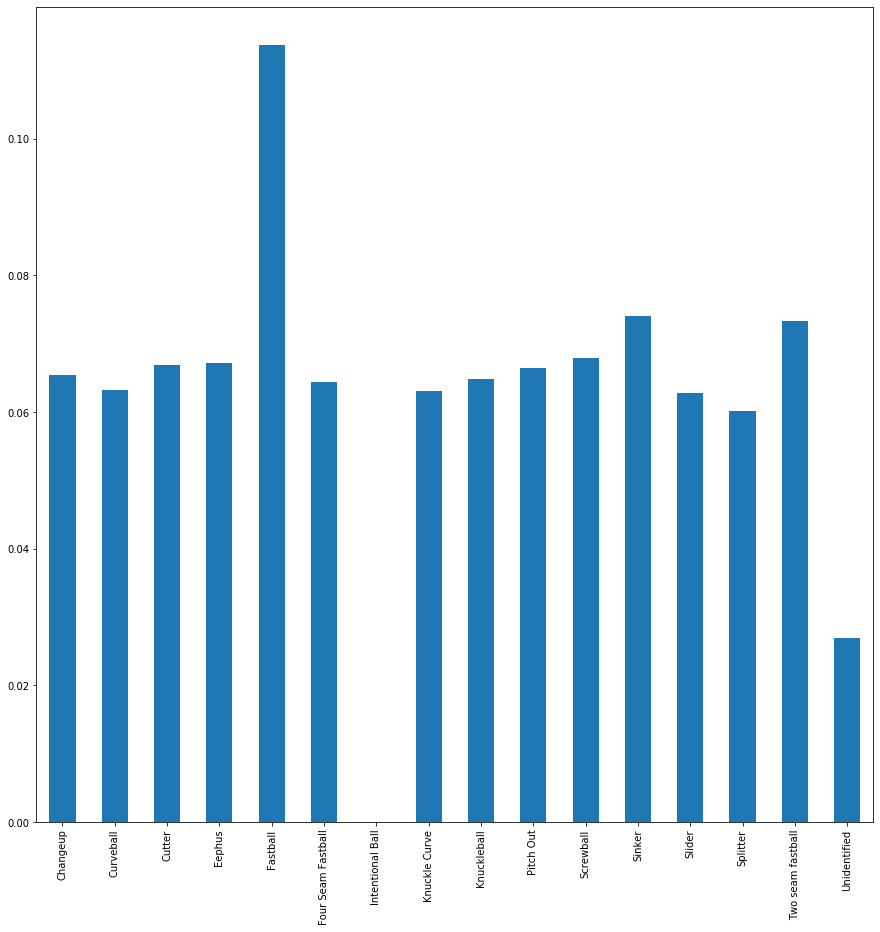

In [427]:
hit_nor_df.plot.bar(y='pitch_type', figsize=(15,15))

In [385]:
def event_analy(dataframe, attribute, target):
    event_set = set(dataframe['event'])
    event_df = dataframe[['event', attribute]]
    event_df[event_df['event']==target][attribute].value_counts()
    

In [ ]:
def plot_pie(df, attribute):
    df = df/df.sum()
    df.plot.pie(y=attribute, figsize=(15,15),autopct='%1.1f%%')

In [ ]:
def plot_bar(df, attriubte):
    hit_nor_df.plot.bar(y='pitch_type', figsize=(15,15))
    df.plot.bar(y='attribute')

In [34]:
final_df

,Batters Name,ab_id,attendance,away_final_score,away_team,ax,ay,az,b_count,b_score,...,vz0,weather,wind,x,x0,y,y0,z0,zone,Pitcher_name
0,Matt Carpenter,2015000001,35055,3,sln,7.665000,34.685000,-11.960000,0.0,0.0,...,-3.995000,"44 degrees, clear","7 mph, In from CF",101.140000,2.280000,158.780000,50.0,5.302000,3.0,Jon Lester
1,Matt Carpenter,2015000001,35055,3,sln,12.043000,34.225000,-10.085000,0.0,0.0,...,-5.980000,"44 degrees, clear","7 mph, In from CF",124.280000,2.119000,175.410000,50.0,5.307000,5.0,Jon Lester
2,Matt Carpenter,2015000001,35055,3,sln,14.368000,35.276000,-11.560000,0.0,0.0,...,-3.337000,"44 degrees, clear","7 mph, In from CF",136.740000,2.127000,150.110000,50.0,5.313000,1.0,Jon Lester
3,Matt Carpenter,2015000001,35055,3,sln,2.104000,28.354000,-20.540000,0.0,0.0,...,-6.567000,"44 degrees, clear","7 mph, In from CF",109.685636,2.279000,187.463482,50.0,5.210000,13.0,Jon Lester
4,Matt Carpenter,2015000001,35055,3,sln,-10.280000,21.774000,-34.111000,1.0,0.0,...,0.325000,"44 degrees, clear","7 mph, In from CF",146.527525,2.179000,177.242829,50.0,5.557000,13.0,Jon Lester
5,Matt Carpenter,2015000001,35055,3,sln,13.590000,32.274000,-10.333000,2.0,0.0,...,-5.738000,"44 degrees, clear","7 mph, In from CF",118.004772,2.273000,164.467012,50.0,5.264000,6.0,Jon Lester
6,Jason Heyward,2015000002,35055,3,sln,14.549000,31.469000,-9.734000,0.0,0.0,...,-7.762000,"44 degrees, clear","7 mph, In from CF",141.430000,2.013000,205.810000,50.0,5.179000,13.0,Jon Lester
7,Jason Heyward,2015000002,35055,3,sln,-1.339000,27.421000,-19.326000,1.0,0.0,...,-4.611000,"44 degrees, clear","7 mph, In from CF",186.410000,2.298000,182.540000,50.0,5.284000,7.0,Jon Lester
8,Matt Holliday,2015000003,35055,3,sln,13.808000,28.169000,-11.591000,0.0,0.0,...,-5.723000,"44 degrees, clear","7 mph, In from CF",93.100000,2.402000,174.060000,50.0,5.310000,14.0,Jon Lester
9,Matt Holliday,2015000003,35055,3,sln,1.218000,28.828000,-19.782000,1.0,0.0,...,-4.904000,"44 degrees, clear","7 mph, In from CF",135.831493,2.165000,182.991946,50.0,5.302000,13.0,Jon Lester


In [ ]:
# make the final full dataframe 2867154 rows x 68 columns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pitches = pd.read_csv("pitches.csv")
games = pd.read_csv("games.csv")
player_name = pd.read_csv("player_names.csv")
pitches["ab_id"] = pitches["ab_id"].astype(int)
player_name.rename(columns={"id": "batter_id" }, inplace=True)